In [1]:
import matplotlib.pyplot as plt
fig_width = 12
fig_height = 10
import seaborn as sns
plt.style.use('seaborn-whitegrid')

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

# 1. Variable packet sizes
- packet sizes = [2, ..., 20]
- number of nodes = 20
- distance = 25
- TX ratio = 80%, RX ratio = 0%
- topology: <img src="broadcast/simulations/25_20.png">


	 broadcast
Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 1621:1621
	Received packets total: 1621/2000, 81.05%

Packet size: 6
	Packets sent by sink: 100
	Packets sent:received by nodes: 1674:1674
	Received packets total: 1674/2000, 83.70%

Packet size: 10
	Packets sent by sink: 100
	Packets sent:received by nodes: 1650:1650
	Received packets total: 1650/2000, 82.50%

Packet size: 16
	Packets sent by sink: 100
	Packets sent:received by nodes: 1635:1635
	Received packets total: 1635/2000, 81.75%

Packet size: 20
	Packets sent by sink: 100
	Packets sent:received by nodes: 1663:1663
	Received packets total: 1663/2000, 83.15%


	 ccbr
Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 1022:1022
	Received packets total: 1022/2000, 51.10%

Packet size: 6
	Packets sent by sink: 100
	Packets sent:received by nodes: 856:856
	Received packets total: 856/2000, 42.80%

Packet size: 10
	Packets sent by sink: 100
	Packets sent:received by nodes: 

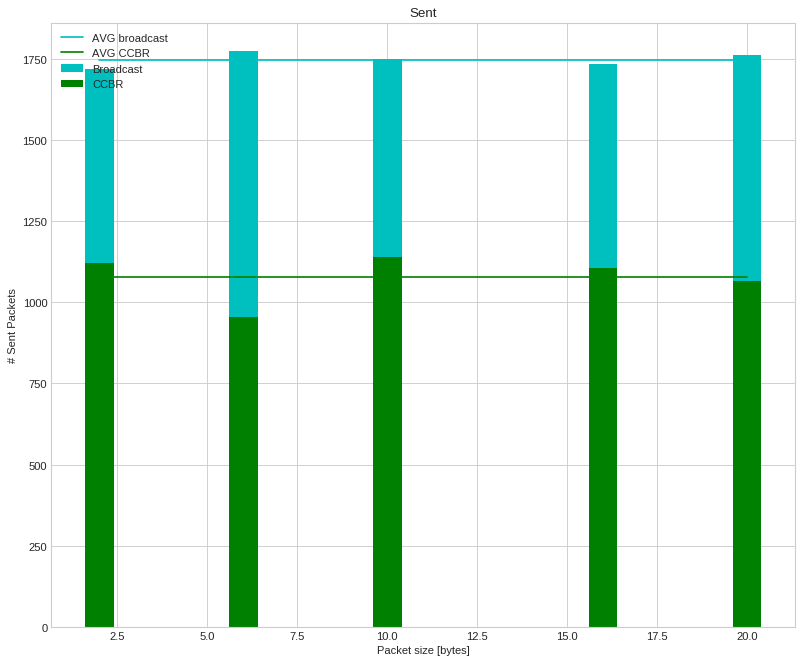

------------ AVG received Broadcast VS CCBR ------------
Received AVG broadcast: 82.43%
Received AVG ccbr: 48.89%

------------ Δ received Broadcast VS CCBR ------------
Δ received 2: 29.95%
Δ received 6: 40.90%
Δ received 10: 30.50%
Δ received 16: 31.50%
Δ received 20: 34.85%

Δ received AVG: 33.54%


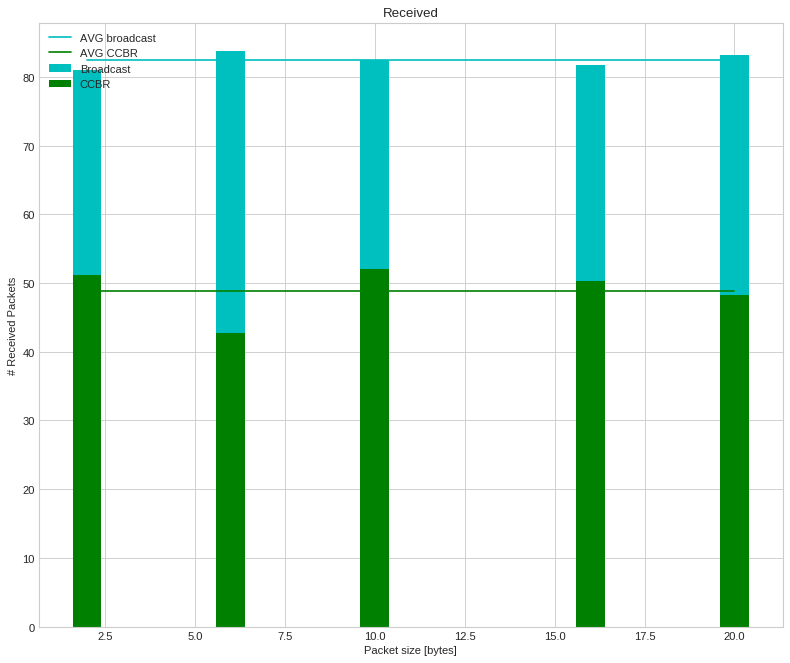

In [2]:
algorithms = ["broadcast", "ccbr"]
packet_sizes = [2,6,10,16,20]
packets = 100
nodes = 20
distance = 25

sent = {}
received = {}

for algorithm in algorithms:
    print("\n\t", bcolors.BOLD + algorithm + bcolors.ENDC)
    sent[algorithm] = list()
    received[algorithm] = list()
    
    for packet_size in packet_sizes:
        filename = "results/packet_size/" + algorithm + "_" + str(packet_size) + "_" + str(distance) + "_"  + str(nodes) + ".txt"
        file = open(filename, "r")
        
        received_by_nodes = list()
        sent_by_nodes = list()
        sent_by_sink = list()
        received_by = []

        for i in range(0, nodes+1):
            received_by.append(list())
        for line in file:
            if ('SinkC: Broadcasting packet 101' in line):
                break
            if ('SinkC: Packet sent' in line):
                sent_by_sink.append(line)
            if ('NodeC: Packet sent' in line):
                sent_by_nodes.append(line)
            if ('NodeC: Received the new packet' in line):
                received_by_nodes.append(line)

        print("Packet size: %d" % packet_size)
        print("\tPackets sent by sink: %d" % len(sent_by_sink))
        print("\tPackets sent:received by nodes: %d:%d" % (len(sent_by_nodes),len(received_by_nodes)))
        print("\tReceived packets total: %d/%d, %.2f%%\n" % (len(received_by_nodes), (packets*nodes), (len(received_by_nodes)/(packets*nodes))*100))
        
        sent[algorithm].append(len(sent_by_sink) + len(sent_by_nodes))
        received[algorithm].append(len(received_by_nodes)/(packets*nodes)*100)

        
print("------------ AVG sent Broadcast VS CCBR ------------")    
print("Sent AVG broadcast: %.2f" % (sum(sent["broadcast"])/len(sent["broadcast"])))
print("Sent AVG ccbr: %.2f" % (sum(sent["ccbr"])/len(sent["ccbr"])))

print("\n------------ Δ sent Broadcast VS CCBR ------------")
d_sent = []
for i in range(0, len(sent["broadcast"])):
    d_sent.append(sent["broadcast"][i] - sent["ccbr"][i])
    print("Δ sent %d: %d" % (packet_sizes[i], d_sent[i]))
print("\nΔ sent AVG: %.2f" % (sum(d_sent)/len(d_sent)))

x1 = packet_sizes
y1 = sent["broadcast"]  

x2 = packet_sizes
y2 = sent["ccbr"]

plt.figure(figsize=(fig_width, fig_height), dpi= 80)
plt.bar(x1, y1, color = 'c', align = 'center', label="Broadcast") 
plt.bar(x2, y2, color = 'g', align = 'center', label="CCBR")
plt.plot(x1, [(sum(sent["broadcast"])/len(sent["broadcast"]))]*len(packet_sizes), color = 'c', label='AVG broadcast')
plt.plot(x1, [(sum(sent["ccbr"])/len(sent["ccbr"]))]*len(packet_sizes), color = 'g', label='AVG CCBR')
plt.title('Sent') 
plt.ylabel('# Sent Packets') 
plt.xlabel('Packet size [bytes]')
plt.legend(loc='upper left')
plt.show()


print("------------ AVG received Broadcast VS CCBR ------------")        
print("Received AVG broadcast: %.2f%%" % (sum(received["broadcast"])/len(received["broadcast"])))
print("Received AVG ccbr: %.2f%%" % (sum(received["ccbr"])/len(received["ccbr"])))

print("\n------------ Δ received Broadcast VS CCBR ------------")        
d_received = []
for i in range(0, len(received["broadcast"])):
    d_received.append(received["broadcast"][i] - received["ccbr"][i])
    print("Δ received %d: %.2f%%" % (packet_sizes[i], received["broadcast"][i] - received["ccbr"][i]))
print("\nΔ received AVG: %.2f%%" % (sum(d_received)/len(d_received)))    

x1 = packet_sizes
y1 = received["broadcast"]  

x2 = packet_sizes
y2 = received["ccbr"]

plt.figure(figsize=(fig_width, fig_height), dpi= 80)
plt.bar(x1, y1, color = 'c', align = 'center', label="Broadcast") 
plt.bar(x2, y2, color = 'g', align = 'center', label="CCBR")
plt.plot(x1, [(sum(received["broadcast"])/len(received["broadcast"]))]*len(packet_sizes), color = 'c', label='AVG broadcast')
plt.plot(x1, [(sum(received["ccbr"])/len(received["ccbr"]))]*len(packet_sizes), color = 'g', label='AVG CCBR')
plt.title('Received') 
plt.ylabel('# Received Packets') 
plt.xlabel('Packet size [bytes]')
plt.legend(loc='upper left')
plt.show()


# 2. Variable number of nodes
- number of nodes = [8, ..., 28]
- packet size = 2 bytes
- distance = 30
- TX ratio = 80%, RX ratio = 80%
- topologies:

<table>
    <tr>
        <td><img src="broadcast/simulations/30_8b.png"></td>
        <td><img src="broadcast/simulations/30_12.png"></td>
        <td><img src="broadcast/simulations/30_16.png"></td>
        <td><img src="broadcast/simulations/30_20.png"></td>
        <td><img src="broadcast/simulations/30_24.png"></td>
        <td><img src="broadcast/simulations/30_28.png"></td>
    </tr>
    <tr>
        <td style="text-align:left">
            <h1>1</h1>
            8 nodes + 1 sink
        </td>
        <td style="text-align:left">
            <h1>2</h1>
            12 nodes + 1 sink
        </td>
        <td style="text-align:left">
            <h1>3</h1>
            16 nodes + 1 sink
        </td>
        <td style="text-align:left">
            <h1>4</h1>
            20 nodes + 1 sink
        </td>
        <td style="text-align:left">
            <h1>5</h1>
            24 nodes + 1 sink
        </td>
        <td style="text-align:left">
            <h1>6</h1>
            28 nodes + 1 sink
        </td>
    </tr>
</table>


	 broadcast
Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 701:701
	Received packets total: 701/800, 87.62%

Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 1163:1163
	Received packets total: 1163/1200, 96.92%

Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 1446:1446
	Received packets total: 1446/1600, 90.38%

Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 1740:1740
	Received packets total: 1740/2000, 87.00%

Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 2221:2221
	Received packets total: 2221/2400, 92.54%

Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 2794:2794
	Received packets total: 2794/2800, 99.79%


	 ccbr
Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 578:578
	Received packets total: 578/800, 72.25%

Packet size: 2
	Packets sent by sink: 100
	Packets sent:received by nodes: 960:960
	

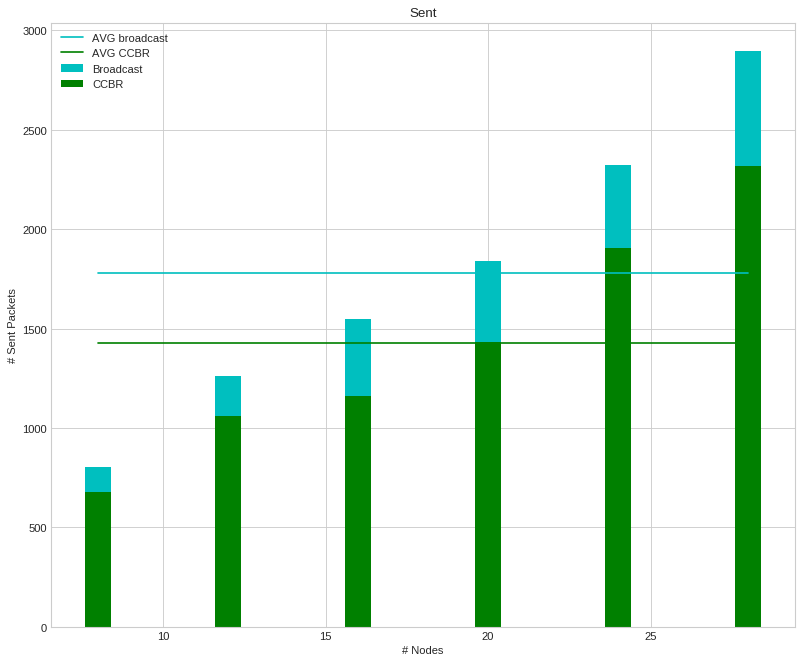

------------ AVG received Broadcast VS CCBR ------------
Received AVG broadcast: 92.37%
Received AVG ccbr: 73.25%

------------ Δ received Broadcast VS CCBR ------------
Δ received 8: 15.38%
Δ received 12: 16.92%
Δ received 16: 24.12%
Δ received 20: 20.50%
Δ received 24: 17.25%
Δ received 28: 20.57%

Δ received AVG: 19.12%


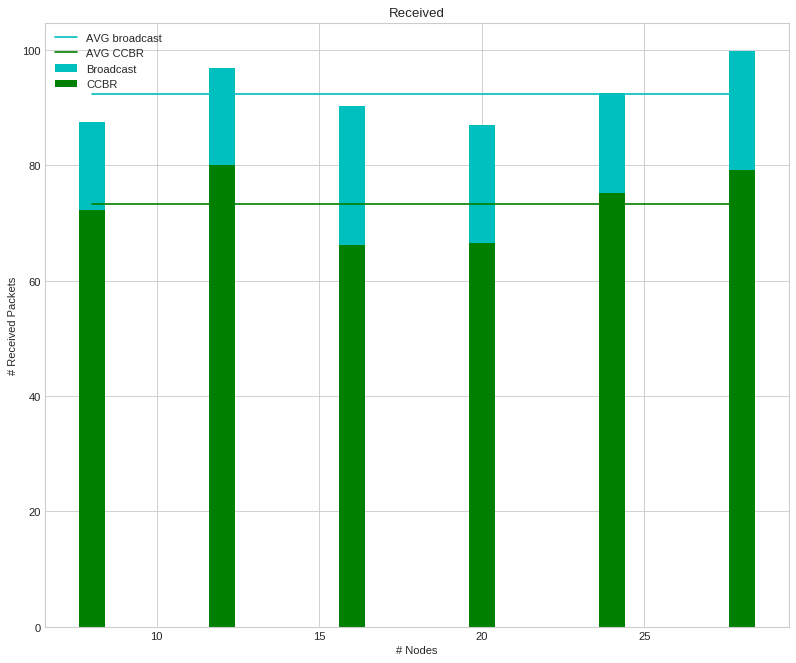

In [3]:
algorithms = ["broadcast", "ccbr"]
packet_size = 2
packets = 100
nodes_number = [8,12,16,20,24,28]
distance = 30

sent = {}
received = {}

for algorithm in algorithms:
    print("\n\t", bcolors.BOLD + algorithm + bcolors.ENDC)
    sent[algorithm] = list()
    received[algorithm] = list()
    
    for nodes in nodes_number:
        filename = "results/nodes/" + algorithm + "_" + str(packet_size) + "_" + str(distance) + "_"  + str(nodes) + ".txt"
        file = open(filename, "r")
        
        received_by_nodes = list()
        sent_by_nodes = list()
        sent_by_sink = list()
        received_by = []

        for i in range(0, nodes+1):
            received_by.append(list())
        for line in file:
            if ('SinkC: Broadcasting packet 101' in line):
                break
            if ('SinkC: Packet sent' in line):
                sent_by_sink.append(line)
            if ('NodeC: Packet sent' in line):
                sent_by_nodes.append(line)
            if ('NodeC: Received the new packet' in line):
                received_by_nodes.append(line)

        print("Packet size: %d" % packet_size)
        print("\tPackets sent by sink: %d" % len(sent_by_sink))
        print("\tPackets sent:received by nodes: %d:%d" % (len(sent_by_nodes),len(received_by_nodes)))
        print("\tReceived packets total: %d/%d, %.2f%%\n" % (len(received_by_nodes), (packets*nodes), (len(received_by_nodes)/(packets*nodes))*100))
        
        sent[algorithm].append(len(sent_by_sink) + len(sent_by_nodes))
        received[algorithm].append(len(received_by_nodes)/(packets*nodes)*100)

print("------------ AVG sent Broadcast VS CCBR ------------")    
print("Sent AVG broadcast: %.2f" % (sum(sent["broadcast"])/len(sent["broadcast"])))
print("Sent AVG ccbr: %.2f" % (sum(sent["ccbr"])/len(sent["ccbr"])))

print("\n------------ Δ sent Broadcast VS CCBR ------------")
d_sent = []
for i in range(0, len(sent["broadcast"])):
    d_sent.append(sent["broadcast"][i] - sent["ccbr"][i])
    print("Δ sent %d: %d" % (nodes_number[i], d_sent[i]))
print("\nΔ sent AVG: %.2f" % (sum(d_sent)/len(d_sent)))

x1 = nodes_number
y1 = sent["broadcast"]  

x2 = nodes_number
y2 = sent["ccbr"]

plt.figure(figsize=(fig_width, fig_height), dpi= 80)
plt.bar(x1, y1, color = 'c', align = 'center', label="Broadcast") 
plt.bar(x2, y2, color = 'g', align = 'center', label="CCBR")
plt.plot(x1, [(sum(sent["broadcast"])/len(sent["broadcast"]))]*len(nodes_number), color = 'c', label='AVG broadcast')
plt.plot(x1, [(sum(sent["ccbr"])/len(sent["ccbr"]))]*len(nodes_number), color = 'g', label='AVG CCBR')
plt.title('Sent') 
plt.ylabel('# Sent Packets') 
plt.xlabel('# Nodes')
plt.legend(loc='upper left')
plt.show()


print("------------ AVG received Broadcast VS CCBR ------------")        
print("Received AVG broadcast: %.2f%%" % (sum(received["broadcast"])/len(received["broadcast"])))
print("Received AVG ccbr: %.2f%%" % (sum(received["ccbr"])/len(received["ccbr"])))

print("\n------------ Δ received Broadcast VS CCBR ------------")        
d_received = []
for i in range(0, len(received["broadcast"])):
    d_received.append(received["broadcast"][i] - received["ccbr"][i])
    print("Δ received %d: %.2f%%" % (nodes_number[i], received["broadcast"][i] - received["ccbr"][i]))
print("\nΔ received AVG: %.2f%%" % (sum(d_received)/len(d_received)))

x1 = nodes_number
y1 = received["broadcast"]  

x2 = nodes_number
y2 = received["ccbr"]

plt.figure(figsize=(fig_width, fig_height), dpi= 80)
plt.bar(x1, y1, color = 'c', align = 'center', label="Broadcast") 
plt.bar(x2, y2, color = 'g', align = 'center', label="CCBR")
plt.plot(x1, [(sum(received["broadcast"])/len(received["broadcast"]))]*len(nodes_number), color = 'c', label='AVG broadcast')
plt.plot(x1, [(sum(received["ccbr"])/len(received["ccbr"]))]*len(nodes_number), color = 'g', label='AVG CCBR')
plt.title('Received') 
plt.ylabel('# Received Packets') 
plt.xlabel('# Nodes')
plt.legend(loc='upper left')
plt.show()

# 3. Variable distance
- distance = [10, ..., 40]
- packet size = 2 bytes
- number of nodes: 8 nodes + 1 sink
- TX ratio = 80%, RX ratio = 0%
- topologies:

<table>
    <tr>
        <td><img src="broadcast/simulations/10_8.png"></td>
        <td><img src="broadcast/simulations/15_8.png"></td>
        <td><img src="broadcast/simulations/20_8.png"></td>
        <td><img src="broadcast/simulations/25_8.png"></td>
        <td><img src="broadcast/simulations/30_8.png"></td>
        <td><img src="broadcast/simulations/35_8.png"></td>
        <td><img src="broadcast/simulations/40_8.png"></td>
    </tr>
    <tr>
        <td style="text-align:left">
            <h1>1</h1>
            distance = 10
        </td>
        <td style="text-align:left">
            <h1>2</h1>
            distance = 15
        </td>
        <td style="text-align:left">
            <h1>3</h1>
            distance = 20
        </td>
        <td style="text-align:left">
            <h1>4</h1>
            distance = 25
        </td>
        <td style="text-align:left">
            <h1>5</h1>
            distance = 30
        </td>
        <td style="text-align:left">
            <h1>6</h1>
            distance = 35
        </td>
        <td style="text-align:left">
            <h1>7</h1>
            distance = 40
        </td>
    </tr>
</table>


	 broadcast
Distance: 10
	Packets sent by sink: 100
	Packets sent:received by nodes: 795:795
	Received packets total: 795/800, 99.38%

Distance: 15
	Packets sent by sink: 100
	Packets sent:received by nodes: 794:794
	Received packets total: 794/800, 99.25%

Distance: 20
	Packets sent by sink: 100
	Packets sent:received by nodes: 755:755
	Received packets total: 755/800, 94.38%

Distance: 25
	Packets sent by sink: 100
	Packets sent:received by nodes: 627:627
	Received packets total: 627/800, 78.38%

Distance: 30
	Packets sent by sink: 100
	Packets sent:received by nodes: 546:546
	Received packets total: 546/800, 68.25%

Distance: 35
	Packets sent by sink: 100
	Packets sent:received by nodes: 292:292
	Received packets total: 292/800, 36.50%

Distance: 40
	Packets sent by sink: 100
	Packets sent:received by nodes: 177:177
	Received packets total: 177/800, 22.12%


	 ccbr
Distance: 10
	Packets sent by sink: 100
	Packets sent:received by nodes: 608:608
	Received packets total: 608/800, 76.

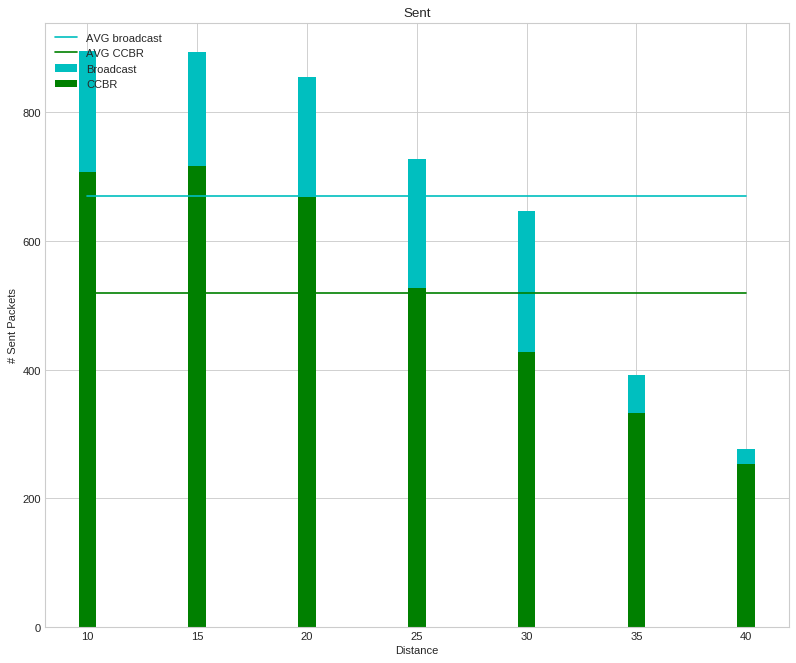

------------ AVG received Broadcast VS CCBR ------------
Received AVG broadcast: 71.18%
Received AVG ccbr: 52.36%

------------ Δ received Broadcast VS CCBR ------------
Δ received 10: 23.38%
Δ received 15: 22.12%
Δ received 20: 23.38%
Δ received 25: 25.00%
Δ received 30: 27.38%
Δ received 35: 7.50%
Δ received 40: 3.00%

Δ received AVG: 18.82%


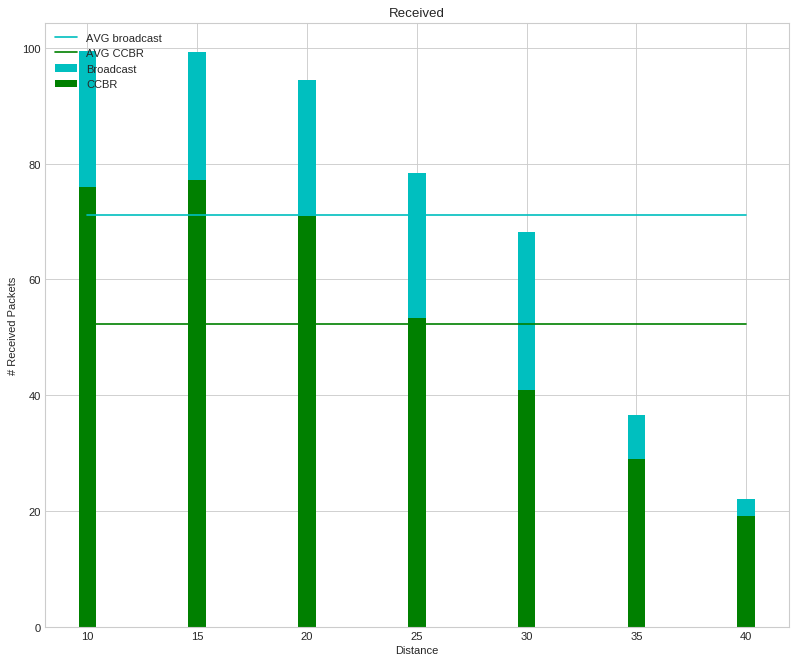

In [9]:
algorithms = ["broadcast", "ccbr"]
packet_size = 2
packets = 100
nodes = 8
distances = [10,15,20,25,30,35,40]

sent = {}
received = {}

for algorithm in algorithms:
    print("\n\t", bcolors.BOLD + algorithm + bcolors.ENDC)
    sent[algorithm] = list()
    received[algorithm] = list()
    
    for distance in distances:
        filename = "results/distances/" + algorithm + "_" + str(packet_size) + "_" + str(distance) + "_"  + str(nodes) + ".txt"
        file = open(filename, "r")
        
        received_by_nodes = list()
        sent_by_nodes = list()
        sent_by_sink = list()
        received_by = []

        for i in range(0, nodes+1):
            received_by.append(list())
        for line in file:
            if ('SinkC: Broadcasting packet 101' in line):
                break
            if ('SinkC: Packet sent' in line):
                sent_by_sink.append(line)
            if ('NodeC: Packet sent' in line):
                sent_by_nodes.append(line)
            if ('NodeC: Received the new packet' in line):
                received_by_nodes.append(line)

        print("Distance: %d" % distance)
        print("\tPackets sent by sink: %d" % len(sent_by_sink))
        print("\tPackets sent:received by nodes: %d:%d" % (len(sent_by_nodes),len(received_by_nodes)))
        print("\tReceived packets total: %d/%d, %.2f%%\n" % (len(received_by_nodes), (packets*nodes), (len(received_by_nodes)/(packets*nodes))*100))
        
        sent[algorithm].append(len(sent_by_sink) + len(sent_by_nodes))
        received[algorithm].append(len(received_by_nodes)/(packets*nodes)*100)

        
print("------------ AVG sent Broadcast VS CCBR ------------")        
print("Sent AVG broadcast: %.2f" % (sum(sent["broadcast"])/len(sent["broadcast"])))
print("Sent AVG ccbr: %.2f" % (sum(sent["ccbr"])/len(sent["ccbr"])))

print("\n------------ Δ sent Broadcast VS CCBR ------------")
d_sent = []
for i in range(0, len(sent["broadcast"])):
    d_sent.append(sent["broadcast"][i] - sent["ccbr"][i])
    print("Δ sent %d: %d" % (distances[i], d_sent[i]))
print("\nΔ sent AVG: %.2f" % (sum(d_sent)/len(d_sent)))
        
x1 = distances
y1 = sent["broadcast"]  

x2 = distances
y2 = sent["ccbr"]

plt.figure(figsize=(fig_width, fig_height), dpi= 80)
plt.bar(x1, y1, color = 'c', align = 'center', label="Broadcast") 
plt.bar(x2, y2, color = 'g', align = 'center', label="CCBR")
plt.plot(x1, [(sum(sent["broadcast"])/len(sent["broadcast"]))]*len(distances), color = 'c', label='AVG broadcast')
plt.plot(x1, [(sum(sent["ccbr"])/len(sent["ccbr"]))]*len(distances), color = 'g', label='AVG CCBR')
plt.title('Sent') 
plt.ylabel('# Sent Packets') 
plt.xlabel('Distance')
plt.legend(loc='upper left')
plt.show()


print("------------ AVG received Broadcast VS CCBR ------------")        
print("Received AVG broadcast: %.2f%%" % (sum(received["broadcast"])/len(received["broadcast"])))
print("Received AVG ccbr: %.2f%%" % (sum(received["ccbr"])/len(received["ccbr"])))

print("\n------------ Δ received Broadcast VS CCBR ------------")        
d_received = []
for i in range(0, len(received["broadcast"])):
    d_received.append(received["broadcast"][i] - received["ccbr"][i])
    print("Δ received %d: %.2f%%" % (distances[i], received["broadcast"][i] - received["ccbr"][i]))
print("\nΔ received AVG: %.2f%%" % (sum(d_received)/len(d_received)))

x1 = distances
y1 = received["broadcast"]  

x2 = distances
y2 = received["ccbr"]

plt.figure(figsize=(fig_width, fig_height), dpi= 80)
plt.bar(x1, y1, color = 'c', align = 'center', label="Broadcast") 
plt.bar(x2, y2, color = 'g', align = 'center', label="CCBR")
plt.plot(x1, [(sum(received["broadcast"])/len(received["broadcast"]))]*len(distances), color = 'c', label='AVG broadcast')
plt.plot(x1, [(sum(received["ccbr"])/len(received["ccbr"]))]*len(distances), color = 'g', label='AVG CCBR')
plt.title('Received') 
plt.ylabel('# Received Packets') 
plt.xlabel('Distance')
plt.legend(loc='upper left')
plt.show()